GROUP: 2

MEMBER:
- Janice Mamani

In [1]:
#import Pkg

#Pkg.add("PlotlyJS")
#Pkg.add("DataFrames")
#Pkg.add("FilePaths")
#Pkg.add("Queryverse")
#Pkg.add("GLM")
#Pkg.add("StatsModels")
#Pkg.add("Combinatorics")
#Pkg.add("Iterators")
#Pkg.add("CategoricalArrays")
#Pkg.add("StatsBase")
#Pkg.add("Lasso")
#Pkg.add("TypedTables")
#Pkg.add("MacroTools")
#Pkg.add("NamedArrays")
#Pkg.add("DataTables")
#Pkg.add("Latexify")
#Pkg.add("PrettyTables")
#Pkg.add("TypedTables")
#Pkg.add("TexTables")
#Pkg.add("StatsModels")
#Pkg.add("DataTables")
#Pkg.add("FilePaths")
#Pkg.add("Combinatorics")
#Pkg.add("CategoricalArrays")
#Pkg.add("TypedTables")
#Pkg.add("MacroTools")

using PlotlyJS
using LinearAlgebra
using GLM, StatsModels
using DataTables
using DelimitedFiles, DataFrames, Lasso
using FilePaths
using StatsModels, Combinatorics
using CategoricalArrays
using StatsBase, Statistics
using TypedTables
using MacroTools
using NamedArrays
using PrettyTables 
using TexTables



#import Pkg; Pkg.add("Graphs")
#import Pkg; Pkg.add("GraphPlot")
#import Pkg; Pkg.add("GraphRecipes")
#import Pkg; Pkg.add("Plots")
using Graphs, GraphRecipes

using Random  
using DataFrames  
using GLM  
using Statistics
using Plots
using StatsModels

WebIO._IJuliaInit()

## Multicollinearity

**Multicollinearity** refers to a situation in which two or more explanatory variables in a multiple regression model are highly linearly related. This presents a problem because it undermines the statistical significance of an independent variable. Other consequences include highly variable least-squares estimates, which can be unstable and difficult to interpret.

### Examples and Implications

1. *Example in Housing Prices*: Consider predicting housing prices based on features like the number of rooms, the size of the house (in square feet), and the number of bedrooms. Often, the number of rooms and the number of bedrooms are correlated because a larger number of rooms generally includes more bedrooms. This correlation can dilute the effect each variable has on the model because it is hard to distinguish their individual contributions to house prices.

2. *Example in Employee Data*: Predicting an employee's salary based on their years of education and years of experience. Typically, higher education might correlate with more years of experience, especially in certain fields. This can lead to multicollinearity issues when both are used as predictors for salary.

### Mathematical Representation

Let's denote the independent variables as $ X_1, X_2, \ldots, X_p $. The regression model can be expressed as:

$$
Y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \ldots + \beta_p X_p + \epsilon
$$

where $ \epsilon $ is the error term. Multicollinearity arises when:

$$
X_j = \alpha_0 + \alpha_1 X_1 + \ldots + \alpha_{j-1} X_{j-1} + \alpha_{j+1} X_{j+1} + \ldots + \alpha_p X_p + \nu
$$

for some variable $ X_j $ being linearly predicted by other independent variables in the model, where $ \nu $ is a small error term.

### Consequences

- *Estimate Variance*: The variance of the estimated coefficients becomes large. This leads to wide confidence intervals and a less precise estimate of the effect size.
- *Coefficient Significance*: Statistical tests for the significance of coefficients might fail to detect true significant relationships due to increased standard errors.

In [3]:
# Define the matrix with the provided values
A = [
    1.76405235  0.40015721  0.97873798  2.2408932   1.86755799 -0.97727788  0.95008842 -0.15135721 -0.10321885;
    0.4105985   0.14404357  1.45427351  0.76103773  0.12167502  0.44386323  0.33367433  1.49407907 -0.20515826;
    0.3130677  -0.85409574 -2.55298982  0.6536186   0.8644362  -0.74216502  2.26975462 -1.45436567  0.04575852;
   -0.18718385  1.53277921  1.46935877  0.15494743  0.37816252 -0.88778575 -1.98079647 -0.34791215  0.15634897;
    1.23029068  1.20237985 -0.38732682 -0.30230275 -1.04855297 -1.42001794 -1.70627019  1.9507754  -0.50965218;
   -0.4380743  -1.25279536  0.77749036 -1.61389785 -0.21274028 -0.89546656  0.3869025  -0.51080514 -1.18063218;
   -0.02818223  0.42833187  0.06651722  0.3024719  -0.63432209 -0.36274117 -0.67246045 -0.35955316 -0.81314628;
   -1.7262826   0.17742614 -0.40178094 -1.63019835  0.46278226 -0.90729836  0.0519454   0.72909056  0.12898291;
    1.13940068 -1.23482582  0.40234164 -0.68481009 -0.87079715 -0.57884966 -0.31155253  0.05616534 -1.16514984;
    0.90082649  0.46566244 -1.53624369  1.48825219  1.89588918  1.17877957 -0.17992484 -1.07075262  1.05445173]

10×9 Matrix{Float64}:
  1.76405     0.400157   0.978738   …   0.950088   -0.151357   -0.103219
  0.410598    0.144044   1.45427        0.333674    1.49408    -0.205158
  0.313068   -0.854096  -2.55299        2.26975    -1.45437     0.0457585
 -0.187184    1.53278    1.46936       -1.9808     -0.347912    0.156349
  1.23029     1.20238   -0.387327      -1.70627     1.95078    -0.509652
 -0.438074   -1.2528     0.77749    …   0.386902   -0.510805   -1.18063
 -0.0281822   0.428332   0.0665172     -0.67246    -0.359553   -0.813146
 -1.72628     0.177426  -0.401781       0.0519454   0.729091    0.128983
  1.1394     -1.23483    0.402342      -0.311553    0.0561653  -1.16515
  0.900826    0.465662  -1.53624       -0.179925   -1.07075     1.05445

In [4]:
# Create a linear combination of columns from A
linear_combination = A[:,1] + 2*A[:,3] + 3*A[:,5]

# Combine A with the new linear combination column to form a full matrix
full_matrix = hcat(A, linear_combination)
full_matrix
    

10×10 Matrix{Float64}:
  1.76405     0.400157   0.978738   …  -0.151357   -0.103219    9.3242
  0.410598    0.144044   1.45427        1.49408    -0.205158    3.68417
  0.313068   -0.854096  -2.55299       -1.45437     0.0457585  -2.1996
 -0.187184    1.53278    1.46936       -0.347912    0.156349    3.88602
  1.23029     1.20238   -0.387327       1.95078    -0.509652   -2.69002
 -0.438074   -1.2528     0.77749    …  -0.510805   -1.18063     0.478686
 -0.0281822   0.428332   0.0665172     -0.359553   -0.813146   -1.79811
 -1.72628     0.177426  -0.401781       0.729091    0.128983   -1.1415
  1.1394     -1.23483    0.402342       0.0561653  -1.16515    -0.668307
  0.900826    0.465662  -1.53624       -1.07075     1.05445     3.51601

In [5]:
try
    A_inv = inv(full_matrix)

    println("Inverse:")
    println(A_inv)
catch e
    println("Error: ", e.message)
end


Inverse:
[-7.499308691290215e14 1.1258999068426211e15 8.704595954330972e14 8.847859382468178e14 6.0331352693682375e13 2.0331018591301212e14 -3.3701793334089406e14 -2.5671397194548644e14 1.458750036240444e14 1.661811280109335e14; 4.390298256471285 -6.821933495971217 -5.33762517268045 -5.644994397454036 0.7249236168260249 0.8444548327004961 1.82119028243803 0.20744004044700382 -3.2815960520632945 -0.7800711378321883; -1.4998617382580468e15 2.251799813685248e15 1.7409191908661988e15 1.7695718764936402e15 1.2066270538736369e14 4.0662037182602325e14 -6.740358666817888e14 -5.134279438909725e14 2.917500072480911e14 3.323622560218675e14; -2.672020017686141 4.450658469601102 3.478752907267328 3.615763357824137 -0.5995342671572008 -0.9984547705927785 -0.5965177588636454 -0.02809969831287229 2.090439487096547 0.36290394474519516; -2.2497926073870702e15 3.377699720527872e15 2.611378786299298e15 2.65435781474046e15 1.809940580810455e14 6.099305577390348e14 -1.0110538000226826e15 -7.70141915836458e1

In [6]:
A_inv = inv(full_matrix)
A_inv

10×10 Matrix{Float64}:
 -7.49931e14   1.1259e15   8.7046e14   …   1.45875e14   1.66181e14
  4.3903      -6.82193    -5.33763        -3.2816      -0.780071
 -1.49986e15   2.2518e15   1.74092e15      2.9175e14    3.32362e14
 -2.67202      4.45066     3.47875         2.09044      0.362904
 -2.24979e15   3.3777e15   2.61138e15      4.37625e14   4.98543e14
  1.87747     -2.95273    -2.66718     …  -1.29111     -0.0574909
  2.76087     -4.14061    -3.13534        -1.97251     -0.716353
 -1.24919      2.23447     1.47041         0.804881     0.287987
 -1.39467      1.76615     1.75792         0.898383    -0.145239
  7.49931e14  -1.1259e15  -8.7046e14      -1.45875e14  -1.66181e14

We observe a discrepancy between the results from Python, Julia and R regarding matrix inversion. In R, attempting to invert a matrix results in an error. This happens because a singular matrix, which does not have an inverse, triggers an error. Conversely, Python and Julia does not produce an error when performing the same operation. This difference is due to Python's and Julia's ability to compute a least squares solution using the Moore-Penrose inverse, effectively producing a pseudo-inverse of the matrix.

Using the traditional approach, since the 10th vector in the matrix is a linear combination of the first three column vectors, the matrix lacks an inverse. This happens because the matrix A is singular. Such a condition, where perfect multicollinearity exists, means the matrix inherently cannot be inverted.

## 2. Analyzing RCT data with Precision Adjustment

### Model 
To evaluate the impact of the treatments on unemployment duration, we consider the linear regression model:

$$
Y =  D \beta_1 + W'\beta_2 + \varepsilon, \quad E \varepsilon (D,W')' = 0,
$$

where $Y$ is  the  log of duration of unemployment, $D$ is a treatment  indicators,  and $W$ is a set of controls including age group dummies, gender, race, number of dependents, quarter of the experiment, location within the state, existence of recall expectations, and type of occupation.   Here $\beta_1$ is the ATE, if the RCT assumptions hold rigorously.


We also consider interactive regression model:

$$
Y =  D \alpha_1 + D W' \alpha_2 + W'\beta_2 + \varepsilon, \quad E \varepsilon (D,W', DW')' = 0,
$$
where $W$'s are demeaned (apart from the intercept), so that $\alpha_1$ is the ATE, if the RCT assumptions hold rigorously.

Under RCT, the projection coefficient $\beta_1$ has
the interpretation of the causal effect of the treatment on
the average outcome. We thus refer to $\beta_1$ as the average
treatment effect (ATE). Note that the covariates, here are
independent of the treatment $D$, so we can identify $\beta_1$ by
just linear regression of $Y$ on $D$, without adding covariates.
However we do add covariates in an effort to improve the
precision of our estimates of the average treatment effect.

In [7]:
# Loading data
mat, head = readdlm("../../GitHub/CausalAI-Course/data/penn_jae.dat", header=true, Float64)
mat
df =DataFrame(mat, vec(head))
describe(df)

Row,variable,mean,min,median,max,nmissing,eltype
,Symbol,Float64,Float64,Float64,Float64,Int64,DataType
1,abdt,10693.6,10404.0,10691.0,10880.0,0,Float64
2,tg,2.56889,0.0,2.0,6.0,0,Float64
3,inuidur1,12.9148,1.0,10.0,52.0,0,Float64
4,inuidur2,12.1938,0.0,9.0,52.0,0,Float64
5,female,0.402142,0.0,0.0,1.0,0,Float64
6,black,0.116653,0.0,0.0,1.0,0,Float64
7,hispanic,0.0363689,0.0,0.0,1.0,0,Float64
8,othrace,0.00575002,0.0,0.0,1.0,0,Float64
9,dep,0.444045,0.0,0.0,2.0,0,Float64


In [8]:
#dimenntions of dataframe 
a = size(df,1)
b =  size(df,2)

23

In [9]:
# Filter control group and just treatment group number 2
penn = filter(row -> row[:tg] in [2,0], df)

first(penn,20)

Row,abdt,tg,inuidur1,inuidur2,female,black,hispanic,othrace,dep,q1,q2,q3,q4,q5,q6,recall,agelt35,agegt54,durable,nondurable,lusd,husd,muld
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,10824.0,0.0,18.0,18.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,10635.0,2.0,7.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,10824.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,10747.0,0.0,27.0,27.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5,10754.0,2.0,20.0,20.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6,10831.0,0.0,27.0,27.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
7,10845.0,0.0,27.0,27.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
8,10831.0,0.0,9.0,9.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
9,10859.0,0.0,27.0,27.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [10]:
# Treatment group n°2
replace!(penn.tg, 2 => 1)


rename!(penn, "tg" => "T2")


# from float to string
penn[!,:dep] = string.(penn[!,:dep]) 

# dep varaible in categorical format 
penn[!,:dep] = categorical(penn[!,:dep])

describe(penn)

Row,variable,mean,min,median,max,nmissing,eltype
,Symbol,Union…,Any,Union…,Any,Int64,DataType
1,abdt,10696.4,10404.0,10698.0,10880.0,0,Float64
2,T2,0.419924,0.0,0.0,1.0,0,Float64
3,inuidur1,13.0334,1.0,11.0,52.0,0,Float64
4,inuidur2,12.2511,0.0,10.0,52.0,0,Float64
5,female,0.400726,0.0,0.0,1.0,0,Float64
6,black,0.118817,0.0,0.0,1.0,0,Float64
7,hispanic,0.0363196,0.0,0.0,1.0,0,Float64
8,othrace,0.00518852,0.0,0.0,1.0,0,Float64
9,dep,,0.0,,2.0,0,"CategoricalValue{String, UInt32}"


# Plotting Histograms for Treatment and Control groups in the variable inuidur1

In [11]:
treatment = filter(row -> row[:tg] in [2], df)
treatment = treatment[:,3]
control = filter(row -> row[:tg] in [0], df)
control = control[:,3]

3354-element Vector{Float64}:
 18.0
  1.0
 27.0
 27.0
 27.0
  9.0
 27.0
 15.0
 28.0
 12.0
 18.0
  1.0
 18.0
  ⋮
 27.0
 16.0
 10.0
 20.0
 27.0
 27.0
 15.0
  1.0
 23.0
  6.0
  9.0
 27.0

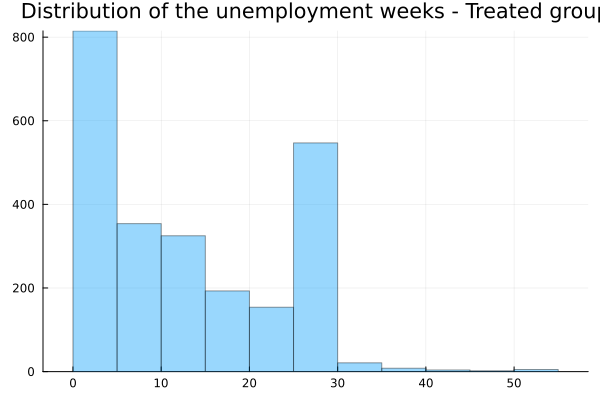

In [12]:
plot1=histogram!(treatment, bins=10,alpha=0.4, title ="Distribution of the unemployment weeks - Treated group", legend= false)
display(plot1)

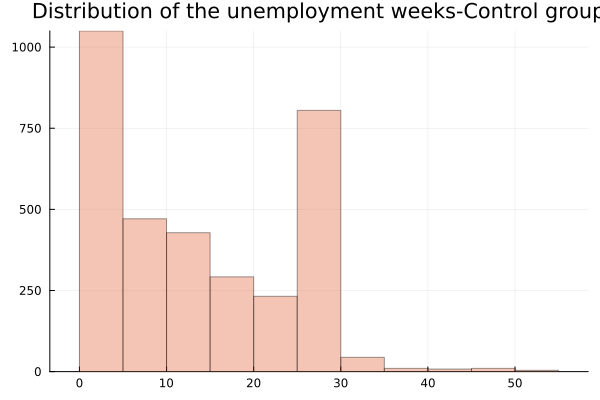

In [13]:
empty!(current())
plot=histogram!(control, bins=10, alpha=0.4, title ="Distribution of the unemployment weeks-Control group", legend= false)
display(plot)

## 2.0 Carry out covariate balance check

In [60]:

# couples variables combinations 
    combinations_upto(x, n) = Iterators.flatten(combinations(x, i) for i in 1:n)

# combinations without same couple
    expand_exp(args, deg::ConstantTerm) =
        tuple(((&)(terms...) for terms in combinations_upto(args, deg.n))...)

    StatsModels.apply_schema(t::FunctionTerm{typeof(^)}, sch::StatsModels.Schema, ctx::Type) =
        apply_schema.(expand_exp(t.args_parsed...), Ref(sch), ctx)

In [ ]:
# linear regression

reg1 = @formula(T2 ~ (female+black+othrace+dep+q2+q3+q4+q5+q6+agelt35+agegt54+durable+lusd+husd)*(female+black+othrace+dep+q2+q3+q4+q5+q6+agelt35+agegt54+durable+lusd+husd))
reg1 = apply_schema(reg1, schema(reg1, penn))

In [17]:
m1 = lm(reg1, penn)
table = regtable( "Covariate Balance Check" => m1) # coeficientes, standar error, squared R, N (sample size)

LoadError: type FunctionTerm has no field args_parsed

In [18]:
m1

LoadError: UndefVarError: `m1` not defined

## 3 Model specification

### 3.1. No Adjustment Regression

In [19]:
# No adjustment (2-sample approach)

ols_cl = lm(@formula(log(inuidur1) ~ T2), penn)

table1 = regtable( "No adjustment model" => ols_cl)   # 

            | No adjustment model 
            |         (1)         
----------------------------------
(Intercept) |            2.057*** 
            |             (0.021) 
         T2 |            -0.079** 
            |             (0.032) 
----------------------------------
          N |               5,782 
      $R^2$ |               0.001 


###  3.2. Classical Linear Regression

In [20]:
# adding controls
# Omitted dummies: q1, nondurable, muld

reg2 = @formula(log(inuidur1) ~ T2 + (female+black+othrace+dep+q2+q3+q4+q5+q6+agelt35+agegt54+durable+lusd+husd)^2)
#reg2 = apply_schema(reg2, schema(reg2, penn))

ols_cra = lm(reg2, penn)
table2 = regtable("CRA model" => ols_cra)

LoadError: type FunctionTerm has no field args_parsed

### 3.3. Interactive Regression Adjustment

In [21]:
# demean function
function desv_mean(a)
    A = mean(a, dims = 1)
    M = zeros(Float64, size(X,1), size(X,2))
    
    for i in 1:size(a,2)
          M[:,i] = a[:,i] .- A[i]
    end
    return M
end    



# Matrix Model & demean
X = StatsModels.modelmatrix(reg1.rhs,penn)
X = desv_mean(X) # matrix format 
 


LoadError: type FunctionTerm has no field args_parsed

In [22]:
Y = select(penn, [:inuidur1,:T2]) # select inuidur1 y T2

X = DataFrame(hcat(X, Matrix(select(penn, [:T2])).*X), :auto)  # Joint X, (T2*X)

base = hcat(Y, X) # Joint inuidur1, T2, X y (T2*X)

base.inuidur1 = log.(base.inuidur1)  # log(inuidur1)

terms = term.(names(base)) # term.() let us to get all variables as objects

#interactive regression model

ols_ira  = lm(terms[1] ~ sum(terms[2:end]), base)


table3 = regtable("Interactive model" => ols_ira)

#terms[1] : select first variable. In this case, oucome of interest 
#sum(terms[2:end]) : independent variables as regresors in the linear regression   

LoadError: UndefVarError: `X` not defined

In [23]:
X = StatsModels.modelmatrix(reg2.rhs,penn)
X = desv_mean(X)


D = DataFrame([X[:,1]], :auto)  # Treatment varaible

rename!(D, Dict(:x1 => :T2)) #rename x1 -> T2

X = DataFrame(hcat(X[:,2:end], X[:,1].*X[:,2:end]), :auto)  # Join Controls (X) + T2*X "interactive"

Y = select(penn, [:inuidur1]) #select just inuidur1

Y.inuidur1 = log.(Y.inuidur1)  # log(inuidur1)





#terms = term.(names(base)) # all terms  
#model = terms[1] ~ sum(terms[2:end])
#lazso = fit(LassoModel,terms[1] ~ sum(terms[2:end]), base; standardize=false, α = 0.1)
#coef(lasso)[2]
#table3 = regtable("Lasso adjustment model" => lasso)

LoadError: type FunctionTerm has no field args_parsed

In [24]:
X

LoadError: UndefVarError: `X` not defined

### 3.4. Interactive Regression Adjustment using Lasso, using HDMJL

In [25]:
include("../hdmjl/hdmjl.jl")

LoadError: SystemError: opening file "C:\\Users\\USUARIO\\Documents\\INF. CAUSAL\\hdmjl\\hdmjl.jl": No such file or directory

In [26]:
X = StatsModels.modelmatrix(reg2.rhs,penn)
X = desv_mean(X)


D = DataFrame([X[:,1]], :auto)  # Treatment varaible

rename!(D, Dict(:x1 => :T2)) #rename x1 -> T2

X = DataFrame(hcat(X[:,2:end], X[:,1].*X[:,2:end]), :auto)  # Join Controls (X) + T4*X "interactive"

Y = select(penn, [:inuidur1]) #select just inuidur1

Y.inuidur1 = log.(Y.inuidur1)  # log(inuidur1)


#terms = term.(names(base)) # all terms  
#model = terms[1] ~ sum(terms[2:end])
#lazso = fit(LassoModel,terms[1] ~ sum(terms[2:end]), base; standardize=false, α = 0.1)
#coef(lasso)[2]
#table3 = regtable("Lasso adjustment model" => lasso)

LoadError: type FunctionTerm has no field args_parsed

In [27]:
D_reg_0  = rlasso_arg( X, D, nothing, true, true, true, false, false, 
                    nothing, 1.1, nothing, 5000, 15, 10^(-5), -Inf, true, Inf, true )

LoadError: UndefVarError: `X` not defined

In [28]:
D_resid = rlasso(D_reg_0)

LoadError: UndefVarError: `rlasso` not defined

In [29]:
D_resid = rlasso(D_reg_0)["residuals"]

LoadError: UndefVarError: `rlasso` not defined

In [30]:
Y_reg_0  = rlasso_arg( X, Y, nothing, true, true, true, false, false, 
                    nothing, 1.1, nothing, 5000, 15, 10^(-5), -Inf, true, Inf, true )


LoadError: UndefVarError: `X` not defined

In [31]:
Y_resid = rlasso(Y_reg_0)["residuals"]

LoadError: UndefVarError: `rlasso` not defined

In [32]:
D_resid = reshape(D_resid, length(D_resid), 1)

LoadError: UndefVarError: `D_resid` not defined

In [33]:
Lasso_ira = lm(D_resid, Y_resid)

LoadError: UndefVarError: `D_resid` not defined

In [34]:
table = NamedArray(zeros(4, 5))

4×5 Named Matrix{Float64}
A ╲ B │   1    2    3    4    5
──────┼────────────────────────
1     │ 0.0  0.0  0.0  0.0  0.0
2     │ 0.0  0.0  0.0  0.0  0.0
3     │ 0.0  0.0  0.0  0.0  0.0
4     │ 0.0  0.0  0.0  0.0  0.0

In [35]:
# Comparative ATE estimation

table = NamedArray(zeros(4, 5))

table[1,2] = GLM.coeftable(ols_cl).cols[1][2]
table[2,2] = GLM.coeftable(ols_cl).cols[2][2]
table[3,2] = GLM.coeftable(ols_cl).cols[5][2]
table[4,2] = GLM.coeftable(ols_cl).cols[6][2]
table[1,3] = GLM.coeftable(ols_cra).cols[1][2]
table[2,3] = GLM.coeftable(ols_cra).cols[2][2]
table[3,3] = GLM.coeftable(ols_cra).cols[5][2]
table[4,3] = GLM.coeftable(ols_cra).cols[6][2]
table[1,4] = GLM.coeftable(ols_ira).cols[1][2]
table[2,4] = GLM.coeftable(ols_ira).cols[2][2]
table[3,4] = GLM.coeftable(ols_ira).cols[5][2]
table[4,4] = GLM.coeftable(ols_ira).cols[6][2]
table[1,5] = GLM.coeftable(Lasso_ira).cols[1][1]
table[2,5] = GLM.coeftable(Lasso_ira).cols[2][1]
table[3,5] = GLM.coeftable(Lasso_ira).cols[5][1]
table[4,5] = GLM.coeftable(Lasso_ira).cols[6][1]

T = DataFrame(table, [ :"Outcome", :"CL", :"CRA", :"IRA", :"IRA W Lasso"])  # table to dataframe 
T[!,:Outcome] = string.(T[!,:Outcome])  # string - first column 

T[1,1] = "Estimation"
T[2,1] = "Standar error"
T[3,1] = "Lower bound CI"
T[4,1] = "Upper bound CI"

header = (["Outcome", "CL", "CRA", "IRA", "IRA W Lasso"])

pretty_table(T; backend = Val(:html), header = header, formatters=ft_round(4), alignment=:c)

#Val(:latex) to tex format (Dataframe or DataTable, table , etc)

#pretty_table(T; backend = Val(:latex), header = header, formatters=ft_round(4), alignment=:c)


LoadError: UndefVarError: `ols_cra` not defined

## 4. Coefficient Plot

In [36]:
#Extrayendo los coeficientes y errores estándar. Esto debe corregirse, lo traté de hacer manualmente, viendo la posición de cada
#variable dentro de los 240 regresores, pero con la extensión del paquete que mostró Roberto hoy los nombres de las variables ya
#se deberían mostrar automáticamente.
T2_female = coef(ols_ira)[122]
T2_black = coef(ols_ira)[123]
T2_agelt35 = coef(ols_ira)[125]
T2_dep = coef(ols_ira)[132]
T2_female_sd = stderror(ols_ira)[122]
T2_black_sd = stderror(ols_ira)[123]
T2_agelt35_sd = stderror(ols_ira)[125]
T2_dep_sd = stderror(ols_ira)[132]

LoadError: UndefVarError: `ols_ira` not defined

In [37]:
coef(ols_ira)[125]

LoadError: UndefVarError: `ols_ira` not defined

In [38]:
coeff = [T2_female,T2_black,T2_dep,T2_agelt35]
std = [T2_female_sd,T2_black_sd,T2_dep_sd,T2_agelt35_sd]
labels = ["T2*Female","T2*Black","T2*agelt35","T2*factor(dep)1"]

LoadError: UndefVarError: `T2_female` not defined

In [39]:

Plots.scatter(labels, coeff, legend = false, yerror = 1.96 .* std, title = "Coefficient plot")


LoadError: MethodError: no method matching *(::Float64, ::typeof(std))

[0mClosest candidates are:
[0m  *(::Any, ::Any, [91m::Any[39m, [91m::Any...[39m)
[0m[90m   @[39m [90mBase[39m [90m[4moperators.jl:587[24m[39m
[0m  *(::T1, [91m::DataValues.DataValue{T2}[39m) where {T1<:Number, T2<:Number}
[0m[90m   @[39m [33mDataValues[39m [90mC:\Users\USUARIO\.julia\packages\DataValues\N7oeL\src\scalar\[39m[90m[4mcore.jl:213[24m[39m
[0m  *(::Union{Number, Matrix}, [91m::Polynomials.AbstractPolynomial[39m)
[0m[90m   @[39m [35mPolynomials[39m [90mC:\Users\USUARIO\.julia\packages\Polynomials\Q5CfJ\src\[39m[90m[4mcommon.jl:1042[24m[39m
[0m  ...


#### Interpretation

# 3. A Crash Course in Good and Bad Controls

## Model 1 - Good Control: Common cause between X and Y

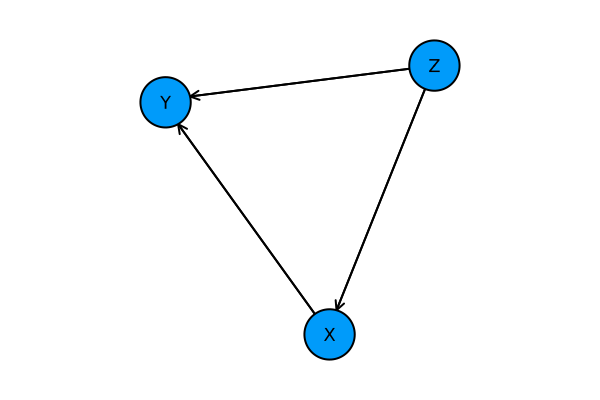

In [40]:
g = SimpleDiGraph(3)

add_edge!(g, 3, 1) 
add_edge!(g, 3, 2) 
add_edge!(g, 1, 2)  

function viewgraph(g)
    graphplot(g,
        # Nodos
        names = ["X", "Y", "Z"],  
        fontsize = 12,
        nodeshape = :circle,
        markersize = 0.15,
        markerstrokewidth = 2,
        linewidth = 2,
        curves = false 
    )
end

viewgraph(g)


In [41]:
Random.seed!(1234567)

n = 1000

Z1 = randn(n)  
X1 = 4 * Z1 + randn(n) 
Y1 = X1 + 0.8 * Z1 + randn(n) 

data1 = DataFrame(Z = Z1, X = X1, Y = Y1)

model1_without_Z = lm(@formula(Y ~ X), data1)
println("Modelo 1 sin Z:")
show(model1_without_Z)

model1_with_Z = lm(@formula(Y ~ X + Z), data1)
println("Modelo 1 con Z:")
show(model1_with_Z)


Modelo 1 sin Z:
StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, CholeskyPivoted{Float64, Matrix{Float64}, Vector{Int64}}}}, Matrix{Float64}}

Y ~ 1 + X

Coefficients:
────────────────────────────────────────────────────────────────────────────
                  Coef.  Std. Error       t  Pr(>|t|)   Lower 95%  Upper 95%
────────────────────────────────────────────────────────────────────────────
(Intercept)  0.00422342  0.0327398     0.13    0.8974  -0.0600233  0.0684701
X            1.19479     0.00811698  147.20    <1e-99   1.17886    1.21072
────────────────────────────────────────────────────────────────────────────Modelo 1 con Z:
StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, CholeskyPivoted{Float64, Matrix{Float64}, Vector{Int64}}}}, Matrix{Float64}}

Y ~ 1 + X + Z

Coefficients:
─────────────────────────────────────────────────────────────────────────
                 Coef. 

## Model 4 - Good Control: Mediator between X and Y with common cause

In [42]:
g = SimpleDiGraph(4) 

add_edge!(g, 4, 1) 
add_edge!(g, 4, 3) 
add_edge!(g, 1, 3)  
add_edge!(g, 3, 2) 

node_labels = ["X4", "Y4", "M4", "Z4"]

function viewgraph(g, edgelabels, node_labels)
    graphplot(g,
        names = node_labels, 
        fontsize = 12,
        nodeshape = :circle,
        markersize = 0.15,
        markerstrokewidth = 2,
        linewidth = 2,
        curves = false 
    )
end

viewgraph(g, node_labels)


LoadError: MethodError: no method matching viewgraph(::SimpleDiGraph{Int64}, ::Vector{String})

[0mClosest candidates are:
[0m  viewgraph(::Any, ::Any, [91m::Any[39m)
[0m[90m   @[39m [35mMain[39m [90m[4mIn[42]:10[24m[39m
[0m  viewgraph(::Any)
[0m[90m   @[39m [35mMain[39m [90m[4mIn[40]:7[24m[39m


In [43]:
Random.seed!(1234567)

n = 1000

Z4 = randn(n)  
X4 = 2 * Z4 + randn(n)  
M4 = 4 * Z4 + X4 + randn(n) 
Y4 = M4 + randn(n) 

data4 = DataFrame(Z = Z4, X = X4, Y = Y4, M = M4)

model4_without_Z = lm(@formula(Y ~ X), data4)
println("\nModelo 4 sin Z:")
show(model4_without_Z)

model4_with_Z = lm(@formula(Y ~ X + Z), data4)
println("\nModelo 4 con Z:")
show(model4_with_Z)



Modelo 4 sin Z:
StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, CholeskyPivoted{Float64, Matrix{Float64}, Vector{Int64}}}}, Matrix{Float64}}

Y ~ 1 + X

Coefficients:
─────────────────────────────────────────────────────────────────────────
                 Coef.  Std. Error      t  Pr(>|t|)  Lower 95%  Upper 95%
─────────────────────────────────────────────────────────────────────────
(Intercept)  -0.114285   0.0734435  -1.56    0.1200  -0.258407  0.0298358
X             2.58471    0.0332486  77.74    <1e-99   2.51946   2.64995
─────────────────────────────────────────────────────────────────────────
Modelo 4 con Z:
StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, CholeskyPivoted{Float64, Matrix{Float64}, Vector{Int64}}}}, Matrix{Float64}}

Y ~ 1 + X + Z

Coefficients:
────────────────────────────────────────────────────────────────────────────
                   Coef.  Std. Error

## Model 7 - Bad Control: Inducing M-bias by controlling a collider

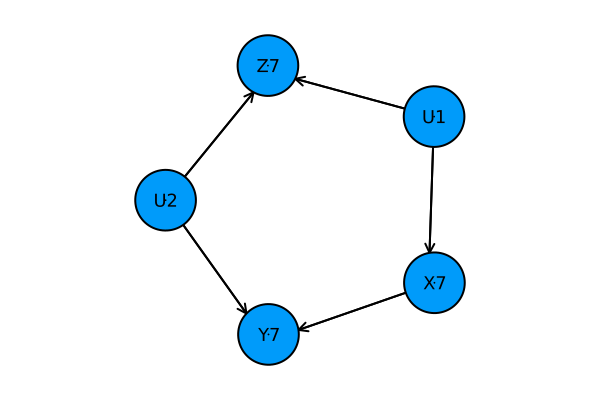

In [44]:
g = SimpleDiGraph(5) 

add_edge!(g, 1, 3) 
add_edge!(g, 2, 3) 
add_edge!(g, 1, 4) 
add_edge!(g, 4, 5) 
add_edge!(g, 2, 5) 

node_labels = ["U1", "U2", "Z7", "X7", "Y7"]

function viewgraph(g, node_labels)
    graphplot(g,
        names = node_labels, 
        fontsize = 12,
        nodeshape = :circle,
        markersize = 0.15,
        markerstrokewidth = 2,
        linewidth = 2,
        curves = false 
    )
end

viewgraph(g, node_labels)


In [45]:
Random.seed!(1234567)

n = 1000

U1 = randn(n) 
U2 = randn(n) 
Z7 = 0.5 * U1 + 0.8 * U2 + randn(n) 
X7 = 3 * U1 + randn(n) 
Y7 = 5 * X7 + U2 + randn(n) 

data7 = DataFrame(Z = Z7, X = X7, Y = Y7)

model7_without_Z = lm(@formula(Y ~ X), data7)
println("\nModelo 7 sin Z:")
show(model7_without_Z)

model7_with_Z = lm(@formula(Y ~ X + Z), data7)
println("\nModelo 7 con Z:")
show(model7_with_Z)



Modelo 7 sin Z:
StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, CholeskyPivoted{Float64, Matrix{Float64}, Vector{Int64}}}}, Matrix{Float64}}

Y ~ 1 + X

Coefficients:
──────────────────────────────────────────────────────────────────────────
                 Coef.  Std. Error       t  Pr(>|t|)  Lower 95%  Upper 95%
──────────────────────────────────────────────────────────────────────────
(Intercept)  -0.013491   0.0470636   -0.29    0.7744  -0.105846  0.0788639
X             5.03076    0.0150852  333.49    <1e-99   5.00116   5.06036
──────────────────────────────────────────────────────────────────────────
Modelo 7 con Z:
StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, CholeskyPivoted{Float64, Matrix{Float64}, Vector{Int64}}}}, Matrix{Float64}}

Y ~ 1 + X + Z

Coefficients:
───────────────────────────────────────────────────────────────────────────
                  Coef.  Std. E

## Model 11 - Bad Control: Overcontrol bias by controlling a mediator

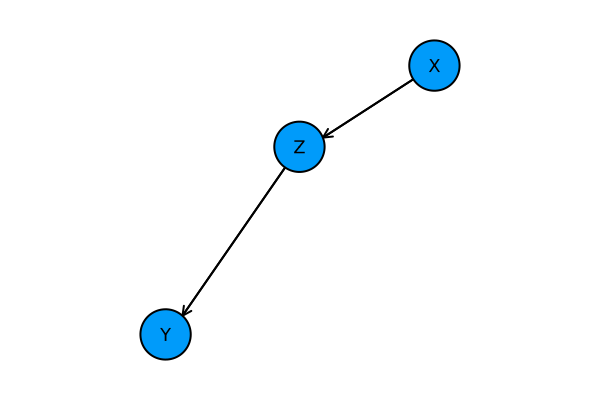

In [46]:
g = SimpleDiGraph(3) 

add_edge!(g, 1, 2)  
add_edge!(g, 2, 3)  

node_labels = ["X", "Z", "Y"]

# Visualiza el DAG
function viewgraph(g, node_labels)
    graphplot(g,
        # Nodos
        names = node_labels, 
        fontsize = 12,
        nodeshape = :circle,
        markersize = 0.15,
        markerstrokewidth = 2,
        linewidth = 2,
        curves = false  
    )
end

viewgraph(g, node_labels)

In [47]:
Random.seed!(1234567)

n = 1000

X11 = randn(n)  
Z11 = 4 * X11 + randn(n)  
Y11 = Z11 + randn(n) 

data11 = DataFrame(Z = Z11, X = X11, Y = Y11)

model11_without_Z = lm(@formula(Y ~ X), data11)
println("\nModelo 11 sin Z:")
show(model11_without_Z)

model11_with_Z = lm(@formula(Y ~ X + Z), data11)
println("\nModelo 11 con Z:")
show(model11_with_Z)



Modelo 11 sin Z:
StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, CholeskyPivoted{Float64, Matrix{Float64}, Vector{Int64}}}}, Matrix{Float64}}

Y ~ 1 + X

Coefficients:
──────────────────────────────────────────────────────────────────────────
                 Coef.  Std. Error      t  Pr(>|t|)   Lower 95%  Upper 95%
──────────────────────────────────────────────────────────────────────────
(Intercept)  0.0359972   0.0445778   0.81    0.4196  -0.0514797   0.123474
X            4.06445     0.0458769  88.59    <1e-99   3.97443     4.15448
──────────────────────────────────────────────────────────────────────────
Modelo 11 con Z:
StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, CholeskyPivoted{Float64, Matrix{Float64}, Vector{Int64}}}}, Matrix{Float64}}

Y ~ 1 + X + Z

Coefficients:
──────────────────────────────────────────────────────────────────────────
                 Coef.  Std. 

## Model 14 - Neutral Control

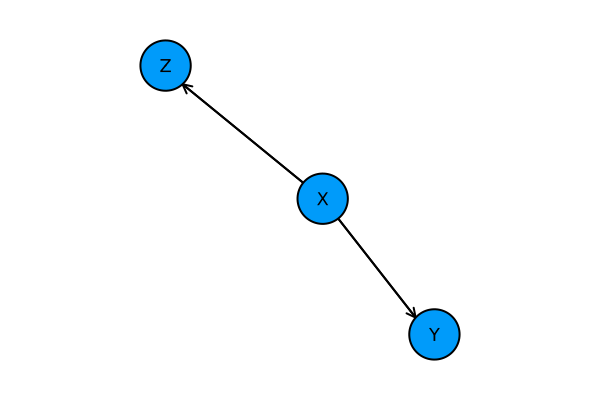

In [48]:
g = SimpleDiGraph(3) 

add_edge!(g, 1, 2)  
add_edge!(g, 1, 3) 

node_labels = ["X", "Z", "Y"]

function viewgraph(g, node_labels)
    graphplot(g,
        names = node_labels,  
        fontsize = 12,
        nodeshape = :circle,
        markersize = 0.15,
        markerstrokewidth = 2,
        linewidth = 2,
        curves = false  
    )
end

viewgraph(g, node_labels)

In [49]:
Random.seed!(1234567)

# Define el tamaño de la muestra
n = 1000

# Genera las variables para el Modelo 14
X14 = randn(n)  # Distribución normal
Z14 = 3 * X14 + randn(n)  # 3*X14 + ruido
Y14 = 8 * X14 + randn(n)  # 8*X14 + ruido

# Crea un DataFrame para el Modelo 14
data14 = DataFrame(Z = Z14, X = X14, Y = Y14)

# Realiza la regresión sin Z14
model14_without_Z = lm(@formula(Y ~ X), data14)
println("\nModelo 14 sin Z:")
show(model14_without_Z)

# Realiza la regresión con Z14
model14_with_Z = lm(@formula(Y ~ X + Z), data14)
println("\nModelo 14 con Z:")
show(model14_with_Z)



Modelo 14 sin Z:
StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, CholeskyPivoted{Float64, Matrix{Float64}, Vector{Int64}}}}, Matrix{Float64}}

Y ~ 1 + X

Coefficients:
───────────────────────────────────────────────────────────────────────────
                 Coef.  Std. Error       t  Pr(>|t|)   Lower 95%  Upper 95%
───────────────────────────────────────────────────────────────────────────
(Intercept)  0.0136463   0.031847     0.43    0.6684  -0.0488484  0.0761411
X            8.04676     0.0327751  245.51    <1e-99   7.98244    8.11107
───────────────────────────────────────────────────────────────────────────
Modelo 14 con Z:
StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, CholeskyPivoted{Float64, Matrix{Float64}, Vector{Int64}}}}, Matrix{Float64}}

Y ~ 1 + X + Z

Coefficients:
───────────────────────────────────────────────────────────────────────────
                  Coef.

### Real-World Examples for Each Model
Here are examples for each model based on real data scenarios:

- **Model 1 (Good Control - Common Cause):** In health studies, controlling for socioeconomic status $Z$ while examining the impact of physical activity $X$ on health outcomes $Y$ can be beneficial, as socioeconomic status can be a common cause affecting both physical activity and health.

- **Model 4 (Good Control - Blocking Back-Door Paths through a Mediator):** In education, controlling for school resources $Z$ in a study of teaching quality $X4$ and student performance $Y$ helps to block back-door paths through intermediaries, providing a more accurate estimate of the effect of teaching quality.

- **Model 7 (Bad Control - M-Bias):** In crime studies, controlling for neighborhood policing $Z$ in examining the relationship between social programs $X$ and crime rates $Y$ can induce bias through a previously unbiased path, because neighborhood policing could be a pre-treatment variable that opens back-door paths.

- **Model 11 (Bad Control - Overcontrol Bias):** In health, controlling for medication adherence $Z$ when evaluating the effect of a treatment $X$ on health outcomes $Y$ can lead to overcontrol bias, as medication adherence might be a mediator through which the treatment affects health outcomes.

- **Model 14 (Neutral Control - Possibly Helpful for Selection Bias):** In sociological studies, controlling for marital status $Z$ while assessing the impact of job training programs $X$ on employment rates $Y$ may not introduce bias and can sometimes be useful to manage selection bias in data collection.
